In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

results_dir = Path("../data/results")
figures_dir = Path("../figures")
figures_dir.mkdir(parents=True, exist_ok=True)

# Load data
global_df = pd.read_csv(results_dir / "global_metrics.csv")
corr_df = pd.read_csv(results_dir / "temporal_spearman_correlations.csv")
turnover_df = pd.read_csv(results_dir / "node_edge_turnover.csv")


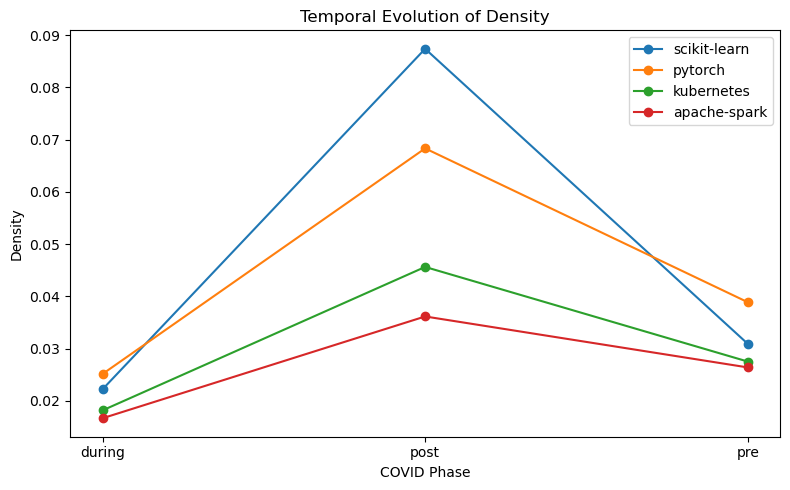

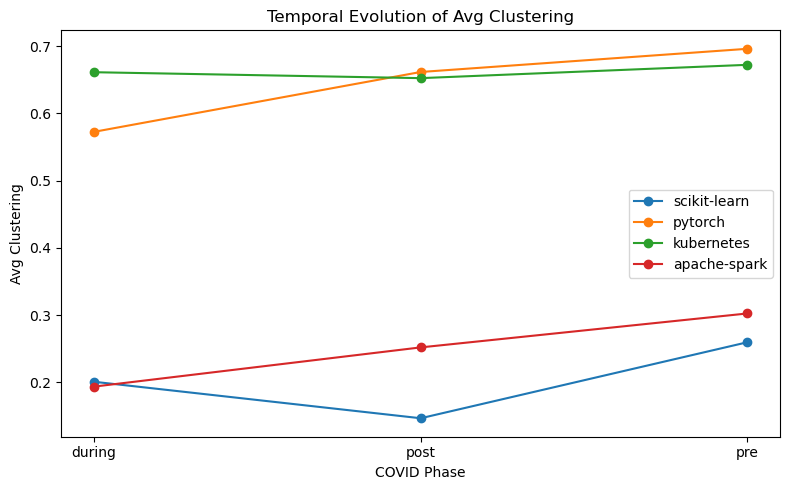

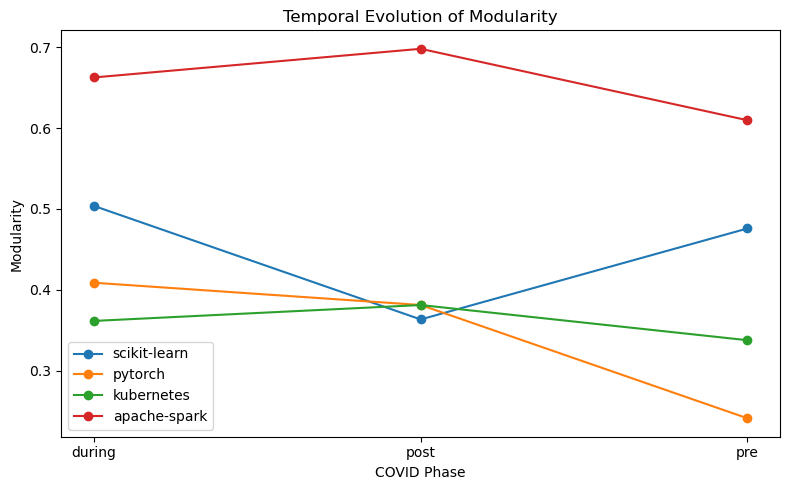

In [2]:
# Line plots for global metrics over time
metrics = ["density", "avg_clustering", "modularity"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    for repo in global_df["repo"].unique():
        subset = global_df[global_df["repo"] == repo].sort_values("phase")
        plt.plot(subset["phase"], subset[metric], marker='o', label=repo)

    plt.title(f"Temporal Evolution of {metric.replace('_', ' ').title()}")
    plt.xlabel("COVID Phase")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.legend()
    plt.tight_layout()
    plt.savefig(figures_dir / f"{metric}_evolution.png")
    plt.show()


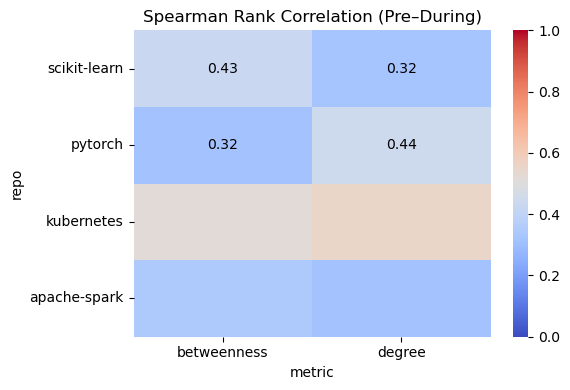

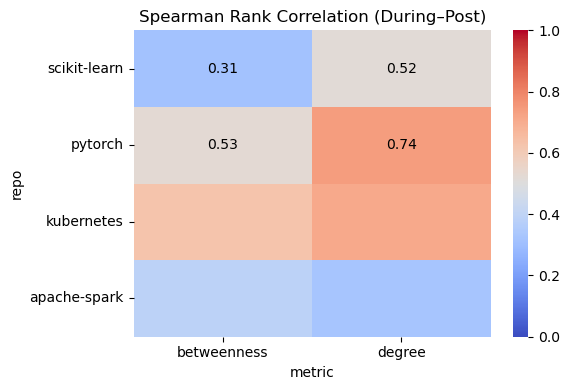

In [9]:
# Define order explicitly
repos = ["scikit-learn", "pytorch", "kubernetes", "apache-spark"]
metrics = ["betweenness", "degree"]

# Pre–During heatmap
pivot_pre = corr_df.pivot(index="repo", columns="metric", values="pre_during_corr")
pivot_pre = pivot_pre.reindex(index=repos, columns=metrics)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_pre, annot=True, cmap="coolwarm", vmin=0, vmax=1, annot_kws={"color": "black"})
plt.title("Spearman Rank Correlation (Pre–During)")
plt.tight_layout()
plt.savefig(figures_dir / "spearman_pre_during_heatmap_fixed.png")
plt.show()

# During–Post heatmap
pivot_post = corr_df.pivot(index="repo", columns="metric", values="during_post_corr")
pivot_post = pivot_post.reindex(index=repos, columns=metrics)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_post, annot=True, cmap="coolwarm", vmin=0, vmax=1, annot_kws={"color": "black"})
plt.title("Spearman Rank Correlation (During–Post)")
plt.tight_layout()
plt.savefig(figures_dir / "spearman_during_post_heatmap_fixed.png")
plt.show()


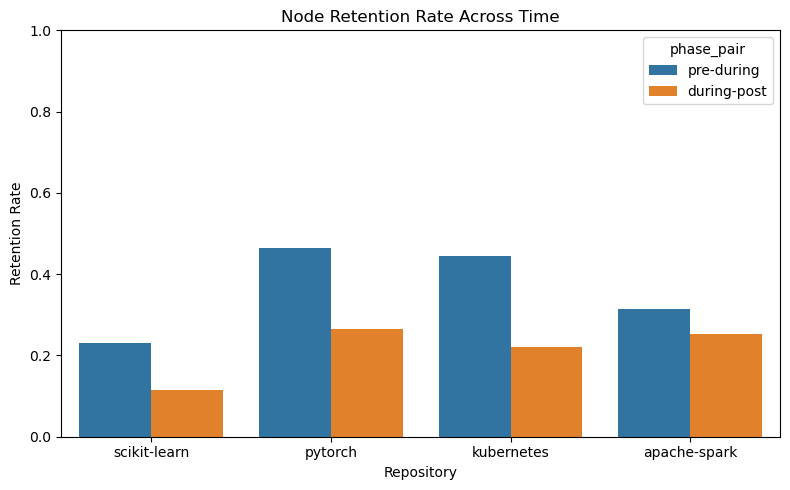

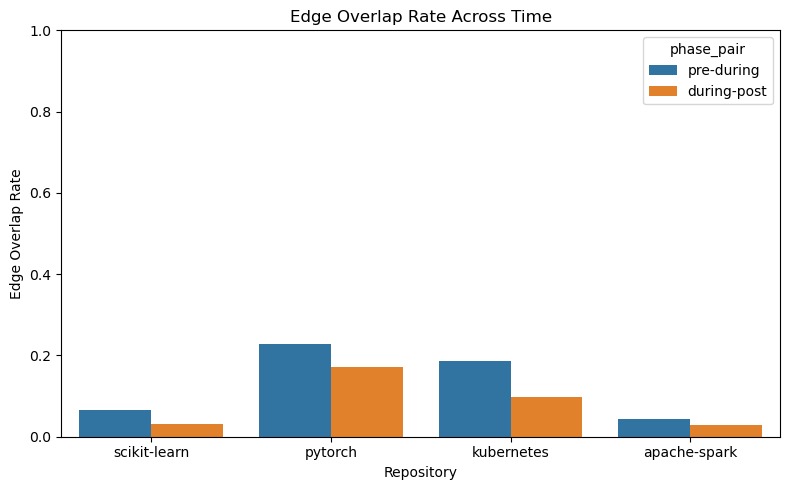

In [4]:
# Bar plots for node and edge turnover
plt.figure(figsize=(8, 5))
sns.barplot(data=turnover_df, x="repo", y="node_retention", hue="phase_pair")
plt.title("Node Retention Rate Across Time")
plt.ylabel("Retention Rate")
plt.xlabel("Repository")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(figures_dir / "node_retention.png")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=turnover_df, x="repo", y="edge_overlap", hue="phase_pair")
plt.title("Edge Overlap Rate Across Time")
plt.ylabel("Edge Overlap Rate")
plt.xlabel("Repository")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(figures_dir / "edge_overlap.png")
plt.show()
